In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1_Extract Macro economic

In [4]:
# Import library
import os
import pandas as pd 
import numpy as np

# Ploting library
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
file_name = '/content/drive/MyDrive/Colab Notebooks/Dataset/'
current = pd.read_csv(file_name+'current.csv', index_col="sasdate")
# current.csv downloaded from 
# 'https://research.stlouisfed.org/econ/mccracken/fred-databases/'

month = pd.read_excel(file_name+'PredictorData2022.xlsx', index_col = 'yyyymm')
# https://sites.google.com/view/agoyal145

markus = pd.read_csv(file_name+'Macro.csv', index_col = 'Date')
# https://mpelger.people.stanford.edu/data-and-code

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


## 1. "current.csv" : 125 macroeconimic variable transform

In [7]:
current_tcode = list(current.values[0])[:]
current_ticker = current.columns.tolist()[:]
current1 = current.iloc[1:] # without transformation code

def transxf(x,tcode) :
    n=x.size
    small=1e-6
    if tcode==1: #  no transformation): x(t)
        y=x
        result=y
    elif tcode==2: # First difference: x(t)-x(t-1)
        y = x.diff()
        result= y
    elif tcode==3:  #Second difference: (x(t)-x(t-1))-(x(t-1)-x(t-2))
        y = x.diff()
        result= y ** 2
    elif tcode==4:    #Natural log: ln(x)
        if min(x) < small:
            y=np.nan
        else :
            y=np.log(x)
        result= y
    elif tcode==5:   #First difference of natural log: ln(x)-ln(x-1)
        y = np.log(x) - np.log(x.shift())
        result=y
    elif tcode==6:   #First difference of natural log: ln(x)-ln(x-1)
        #y = np.log(x) - np.log(x.shift())
        ln_diff1 = np.log(x) - np.log(x.shift())
        ln_diff2 = np.log(x.shift()) - np.log(x.shift(periods=2))
        result=ln_diff1 - ln_diff2
        #result=y**2 
    elif tcode==7 :  #First difference of percent change: (x(t)/x(t-1)-1)-(x(t-1)/x(t-2)-1)
        y=(x/x.shift(1) - 1) - (x.shift(1)/x.shift(2) - 1)
        result=y
    return result 

yt=[]                #Initialize output variable                   
N=current1.shape[1]  #Number of series kept
for i in range(0,N):   
    dum=transxf(current1.iloc[:,i],current_tcode[i])
    yt.append(dum)

trans_data=pd.DataFrame(yt).T
trans_data.columns=current1.columns
trans_data.index = current1.index
#trans_data.to_csv('current_transformed.csv')  

## 2.  Plot examples of macroeconomic variabels

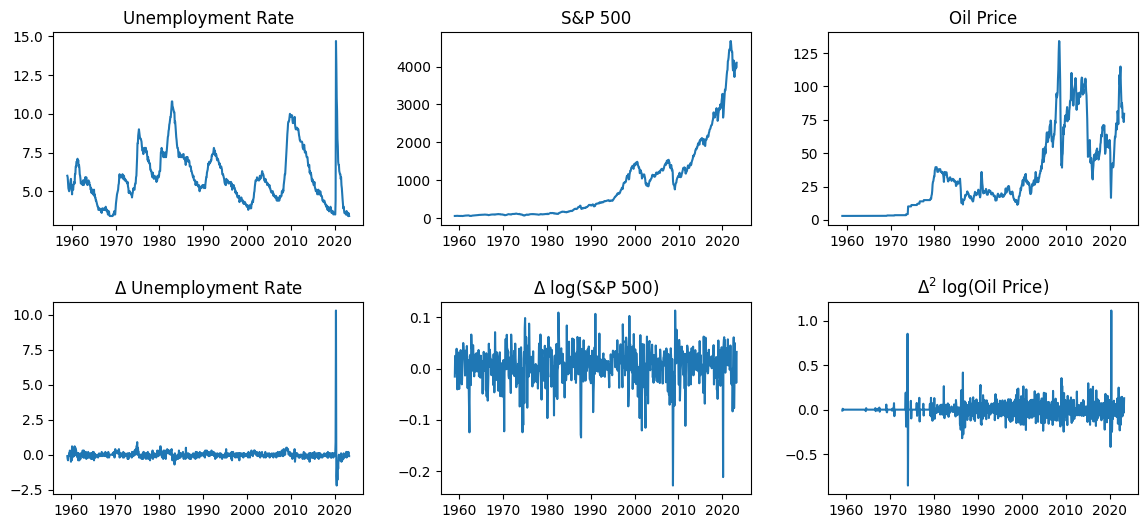

In [8]:
bdf = trans_data.copy()
df.index = pd.to_datetime(df.index)
df_raw = current.copy().iloc[1:]
df_raw.index = pd.to_datetime(df_raw.index)

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, sharex=False,
                                    figsize=(14, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.25)
ax0.set_title('Unemployment Rate')
ax0.plot(df_raw.index,df_raw['UNRATE'])
ax1.set_title('S&P 500')
ax1.plot(df_raw.index,df_raw['S&P 500'])
ax2.set_title('Oil Price')
ax2.plot(df_raw.index,df_raw['OILPRICEx'])
ax3.set_title('$\Delta$ Unemployment Rate')
ax3.plot(df.index,df['UNRATE'])
ax4.set_title('$\Delta$ log(S&P 500)')
ax4.plot(df.index,df['S&P 500'])
ax5.set_title('$\Delta^2$ log(Oil Price)')
ax5.plot(df.index,df['OILPRICEx'])

#plt.tight_layout()  # Adjusts the spacing between subplots
# Save the figure
if not os.path.exists('images'):
    os.makedirs('images')
plt.savefig('images/examples_macro.png',bbox_inches='tight') 

plt.show()  # Displays the plot

## 3. "current_transformed.csv" Data Validation

In [9]:
trans_data_val = trans_data.copy()
trans_data_val = trans_data_val.loc['12/1/1966':'11/1/2016']
trans_data_val_col = trans_data_val.columns.tolist()

markus_col = markus.columns.tolist()

def common(a,b): 
    c = [value for value in a if value in b] 
    return c
common=common(trans_data_val_col,markus_col)

markus_new = markus[common]
trans_data_new = trans_data_val[common]

markus_new.set_index(trans_data_new.index, inplace = True)

for i in markus_new.columns.tolist():
    print(i,trans_data_new[i].corr(markus_new[i]))

RPI 0.9965293312516561
W875RX1 0.9954494450598229
DPCERA3M086SBEA 0.9973953288021801
CMRMTSPLx 0.9992681466001032
RETAILx 0.9995679557116278
INDPRO 0.9960689255001531
IPFPNSS 0.9938968508517413
IPFINAL 0.994219999524016
IPCONGD 0.9954796483522895
IPDCONGD 0.9979826897977032
IPNCONGD 0.9913227641928709
IPBUSEQ 0.9944142411238618
IPMAT 0.9973310742752494
IPDMAT 0.9970634667856064
IPNMAT 0.9968492388111344
IPMANSICS 0.9955382099245152
IPB51222S 0.9970791975562839
IPFUELS 0.9993516101578341
CUMFNS 0.9952213676892806
HWI 0.838579744538389
HWIURATIO 0.927679184276422
CLF16OV 0.9980404978595494
CE16OV 0.9995425397448456
UNRATE 0.9954467132414587
UEMPMEAN 0.9938633093685549
UEMPLT5 0.9988685120969619
UEMP5TO14 0.999492291770781
UEMP15OV 0.9992001675975167
UEMP15T26 0.997786417999089
UEMP27OV 0.9995380829879275
CLAIMSx 0.9996679034580038
PAYEMS 0.9990535010682227
USGOOD 0.9997069354260556
CES1021000001 0.9994517578704231
USCONS 0.9996052123558182
MANEMP 0.9998789964703052
DMANEMP 0.999934395133

## 4."PredictorData2022.xlsx" : 8 macroeconimic variable transform

In [19]:
variable = ['dp','ep','b/m','ntis','tbl','tms','dfy','svar',]
tcodes = [2,2,5,2,2,1,2,5]
month["dp"] = np.log(month["D12"]) - np.log(month["Index"])
month["ep"] = np.log(month["E12"]) - np.log(month["Index"])
month['tms'] = month['lty'] - month['tbl']
month['dfy'] = month['BAA'] - month['AAA']

yt=[]                #Initialize output variable                   
N=month_new.shape[1]  #Number of series kept
for i in range(0,N):   
    dum=transxf(month_new.iloc[:,i],tcodes[i])
    yt.append(dum)
trans_macro = pd.DataFrame(yt).T

#trans_macro.to_csv('macro8_transformed.csv')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 5."macro8_transformed.csv": Data Validation

In [21]:
trans_macro8 = trans_macro.copy()
trans_macro8 =trans_macro8.loc['196612': '201611']

Macro_markus = markus[variable]

Macro_markus.reset_index(inplace = True) 
trans_macro8.reset_index(binplace = True) 

for i in Macro_markus.columns.tolist()[1:]:
    print(i, Macro_markus[i].corr(trans_macro8[i]))

dp 0.9995474693697404
ep 0.9997966571584396
b/m 0.9221973057312425
ntis 0.9997256637755889
tbl 0.9999984092084159
tms 0.9999999261109785
dfy 1.0
svar 0.9999999993189495


## 6.Merge Dataset:


In [24]:
current_trans = trans_data.copy()
macro8_trans = trans_macro.copy()

current_trans = current_trans.loc['1/1/1980':'12/1/2022']
macro8_trans = macro8_trans.loc['198001':'202212']
macro8_trans.set_index(current_trans.index, inplace =True)
total_macro = pd.concat([current_trans, macro8_trans], axis=1)

In [25]:
total_macro.isnull().sum().sort_values(ascending = False)

ACOGNO       146
CP3Mx          2
COMPAPFFx      1
BAA            0
TB3SMFFM       0
            ... 
USTPU          0
SRVPRD         0
NDMANEMP       0
DMANEMP        0
svar           0
Length: 135, dtype: int64

In [ ]:
total_macro.drop(columns = ['ACOGNO'], inplace = True)

missing_cols = ['CP3Mx','COMPAPFFx']
for i in missing_cols:
    total_macro[i].fillna(total_macro[i].mean, inplace = True)

total_macro.to_csv('total_macro_normalized.csv')
!cp total_macro_normalized.csv "/content/drive/MyDrive/Colab Notebooks/Dataset/"